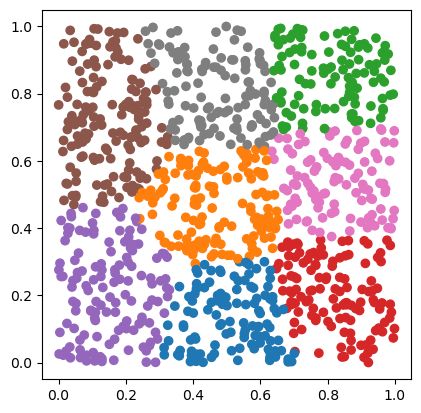

In [28]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)  # For reproducibility
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Assign clusters based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Compute new centroids as the mean of assigned points
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Assign clusters based on closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

# Testing the implementation
import matplotlib.pyplot as plt

X = np.random.rand(1000, 2)  # 1000 data points, 2 features
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=[f'C{l}' for l in labels])
ax.set_aspect('equal')
plt.show()


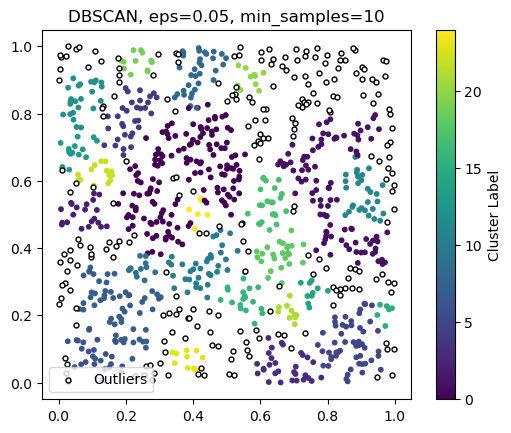

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate the same 2D data
X = np.random.rand(1000, 2)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=10)
labels = dbscan.fit_predict(X)

# Plot the clustered data
fig, ax = plt.subplots()
# Plot the clusters
scatter = ax.scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1], cmap='viridis', s=10)
# Plot the outliers
ax.scatter(X[labels == -1, 0], X[labels == -1, 1], c='white', marker='.', s=50, edgecolors='black', label='Outliers')
ax.set_aspect('equal')
plt.colorbar(scatter, label="Cluster Label")
plt.title("DBSCAN, eps=0.05, min_samples=10")
plt.legend()
plt.show()

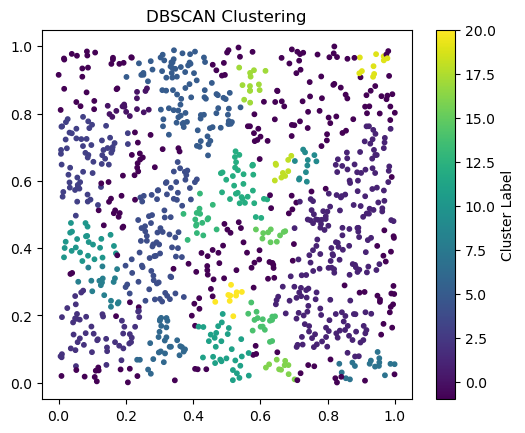

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate the same 2D data
X = np.random.rand(1000, 2)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=10)
labels = dbscan.fit_predict(X)

# Plot the clustered data
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
ax.set_aspect('equal')
plt.colorbar(scatter, label="Cluster Label")
plt.title("DBSCAN Clustering")
plt.show()


C:\Users\Sebastian Dahl\AppData\Local\Temp\ipykernel_17800\1311252807.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


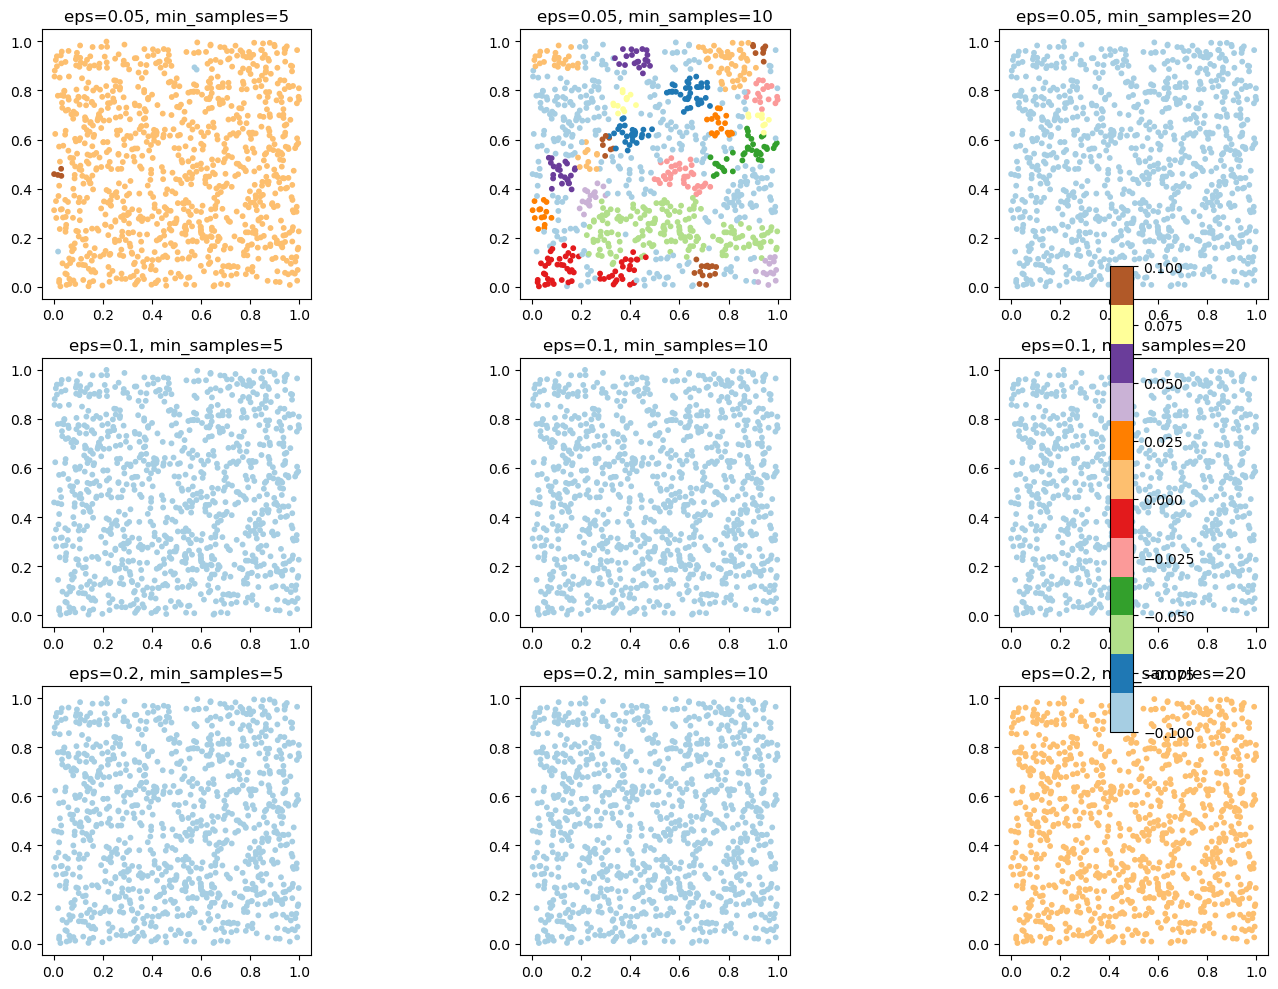

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate 2D data
X = np.random.rand(1000, 2)  # 1000 data points, 2 features

# Apply DBSCAN
# Experiment with varying epsilon (eps) and minimum samples (min_samples)
eps_values = [0.05, 0.1, 0.2]
min_samples_values = [5, 10, 20]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        ax = axes[i, j]
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', s=10)
        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.set_aspect('equal')

fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02)
plt.tight_layout()
plt.show()
